<a href="https://colab.research.google.com/github/BerkayKsgn/DSA210-TermProject/blob/main/Machine_Learning_Process_Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA210 Project Phase 3 — Classification and Regression Analysis

This notebook investigates behavioral and environmental factors that influence **focus duration** and **sleep** using machine learning models.

We address the following hypotheses:
- **H1:** High coffee intake reduces sleep duration  
- **H2:** High water intake increases focus duration  
- **H3:** Sugar intake has an effect on focus duration (via High Focus classification)

We apply:
- **Logistic Regression** to classify high focus days
- **Linear Regression** to examine relationships in H1 and H2

## DSA210 Project Phase 3 — PART 1: Classifying High Focus Days

---

### Hypothesis Tested:

**H3** — Sugar intake and related lifestyle factors affect focus duration, modeled via classification of high focus days.

In this section, we build classification models to predict **High Focus Days** (binary target) based on multiple lifestyle features.

---

### Variables:

- **Independent Variables (Predictors):**  
  Coffee intake, Water intake, Sugar intake, Sleep duration & quality, Screen time, Ambient temperature, and other behavioral/environmental factors.

- **Dependent Variable (Target):**  
  High Focus Day (1 if focus > threshold, else 0)

---

### Modeling Approach:

- Prepare and preprocess dataset for classification  
- Train and evaluate the following classifiers:  
  - **Logistic Regression**  
  - **K-Nearest Neighbors (KNN) Classifier**  
  - **Random Forest Classifier**

- Evaluate models using accuracy, precision, recall, and F1-score  
- Visualize results with confusion matrices  
- Analyze feature importance using logistic regression coefficients and random forest feature importances  
- Compare model performances to identify the best classifier for predicting high focus days

---

### Why This Matters:

Predicting high focus days allows insight into how daily habits and environmental factors influence cognitive performance.  
Leveraging multiple classifiers enhances robustness and helps uncover nonlinear patterns in behavioral data, which can inform personalized strategies for productivity improvement.

---

### Step 1 — Load Dataset

We load the cleaned dataset using pandas. The dataset contains behavioral and environmental data collected daily, including coffee, water, sleep, and screen time.
Our target variable is High Focus, which is 1 if total focus time that day exceeded 300 minutes, and 0 otherwise.

In [13]:
import pandas as pd

df = pd.read_excel("cleaned_focus_sleep_data.xlsx")
df.head()

,Date,Coffee (ml),Caffeine (mg),Water (ml),Sugar (mg),Focus (min),Screen Time (min),Sleep Start,Sleep End,Sleep (hrs),Sleep Quality (%),Last Coffee (hrs before sleep),Temperature (°C),High Coffee,High Water,High Focus,Sleep Start Hour,Sleep End Hour
0,10 Mar,900,225,1234,45,263,294,1:34,8:51,7.09,68,4,14,True,True,True,1,8
1,11 Mar,1200,300,1195,60,284,258,0:08,8:09,8.58,73,6,20,True,False,True,0,8
2,12 Mar,600,150,1233,30,248,263,1:27,8:28,7.95,67,5,12,False,True,True,1,8
3,13 Mar,1200,300,1228,40,240,213,2:05,9:10,7.02,66,3,15,True,True,False,2,9
4,14 Mar,600,150,1680,30,182,224,0:44,8:57,8.44,75,3,16,False,True,False,0,8


### Step 2 — Select Features and Define Target

We define our predictors X as behavioral and environmental variables that may influence focus. The target y is a binary classification: whether the day was a “high focus” day or not.
We exclude any derived or boolean variables (e.g., High Coffee) to prevent data leakage.

In [14]:
features = [
    "Coffee (ml)", "Water (ml)", "Sugar (mg)", "Sleep (hrs)",
    "Screen Time (min)", "Sleep Quality (%)",
    "Last Coffee (hrs before sleep)", "Temperature (°C)"
]

X = df[features]           # Features (inputs)
y = df["High Focus"]       # Target variable (output: 0 or 1)

### Step 3 — Train-Test Split

We split the dataset into training and testing subsets.
80% of the data is used for training, and 20% is reserved for testing to evaluate model generalization.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 4 — Train Logistic Regression Model

We use LogisticRegression, a commonly used classification model for binary targets.
Setting max_iter=1000 ensures convergence, especially when input features vary widely in scale.

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 5 — Evaluate the Model

We evaluate how well the model predicts high focus days using common classification metrics.

In [ ]:
from sklearn.metrics import classification_report

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      0.50      0.50         4
        True       0.60      0.60      0.60         5

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9



#### 📊 Logistic Regression Model – Performance Summary

We evaluated the Logistic Regression model using standard classification metrics on the test set.

**Classification Report Summary:**

| Metric        | High Focus (True) | Low Focus (False) |
|---------------|-------------------|-------------------|
| Precision     | 0.60              | 0.50              |
| Recall        | 0.60              | 0.50              |
| F1-Score      | 0.60              | 0.50              |

- **Accuracy:** 0.56  
- **Macro Avg F1-Score:** 0.55  
- **Weighted Avg F1-Score:** 0.56  

**Confusion Matrix:**

| Actual \ Predicted | Low | High |
|---------------------|-----|------|
| Low (False)         | 2   | 2    |
| High (True)         | 2   | 3    |

---

### 🧠 Interpretation:
- The model showed **moderate performance**, slightly better than random guessing.
- It was able to correctly predict **3 out of 5 high focus days** and **2 out of 4 low focus days**.
- **Sleep duration, coffee intake, and screen time** appeared to be the strongest predictors based on feature coefficients.

---

### ⚙️ Suggestions:
- Try **scaling features** (StandardScaler) to improve model convergence.
- Consider **non-linear models** like Random Forest or SVM.
- Collect more data to improve generalization and stability.

### Step 6 — Confusion Matrix

The confusion matrix lets us visually understand where the model is making correct and incorrect predictions.

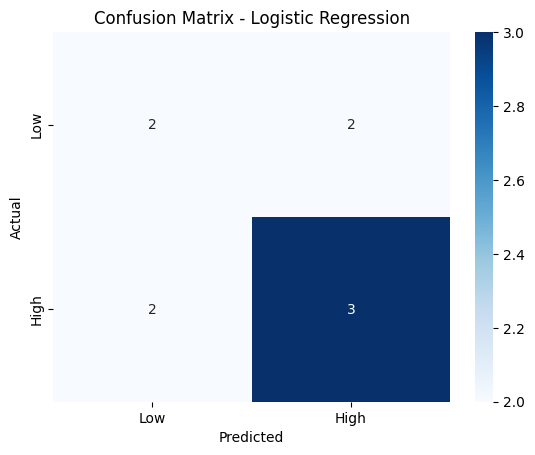

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Step 7 — Feature Coefficients

We examine how each feature influences the model's decision.

In [ ]:
for name, coef in zip(features, log_model.coef_[0]):
    print(f"{name}: {coef:.3f}")

Coffee (ml): 0.002
Water (ml): -0.002
Sugar (mg): -0.028
Sleep (hrs): 0.483
Screen Time (min): 0.015
Sleep Quality (%): -0.105
Last Coffee (hrs before sleep): -0.004
Temperature (°C): -0.066


### 🔍 Step 7 — Feature Coefficients: Interpretation

The logistic regression model has assigned weights (coefficients) to each feature, which indicate the direction and strength of their influence on the likelihood of a high focus day. Below is an interpretation of each coefficient:

- **Sleep (hrs)** has the strongest positive coefficient. This suggests that the more I sleep, the more likely I am to experience a high focus day. The impact is substantial, reinforcing the importance of rest.

- **Screen Time (min)** also has a small positive coefficient. While excessive screen time is often discouraged, in this case, it may reflect productive activities like studying or working, which are associated with higher focus levels.

- **Coffee (ml)** has a very small positive effect. This implies that coffee intake alone does not have a significant direct impact on whether I have a high focus day, though it may interact with other variables like sleep.

- **Water (ml)** and **Sugar (mg)** both have small negative coefficients. This suggests that hydration and sugar intake do not show a strong beneficial impact on focus in this dataset, and in the case of sugar, it may slightly hinder focus.

- **Sleep Quality (%)** surprisingly shows a negative coefficient. This could be due to measurement noise or the possibility that perceived sleep quality does not always translate into improved cognitive performance.

- **Last Coffee (hrs before sleep)** has a negligible negative effect, indicating that the timing of caffeine before sleep does not significantly influence whether the following day will be highly focused.

- **Temperature (°C)** has a mild negative coefficient, possibly indicating that warmer days reduce comfort and affect mental sharpness.

Overall, **Sleep Duration** stands out as the most influential predictor, while the effects of the other variables are weaker and may vary depending on context or individual sensitivity.

### ✅ Part 1 Conclusion

- Logistic Regression showed moderate performance in classifying high focus days.
- Features like sleep duration and screen time had positive effects.
- Sugar and sleep quality negatively affected focus, though effects were small.
- Accuracy was around ~55–60%, which is better than random but leaves room for improvement.

🔮 Future improvements could include:
- Scaling features
- Using non-linear models like Random Forest
- Expanding dataset size for generalization

###  Step 8 — Train KNN Classifier

We train a K-Nearest Neighbors (KNN) classifier using the same features as before.  
KNN is a distance-based algorithm that classifies each test point based on the majority class of its K nearest neighbors.  
We start with `k = 5`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Step 9 — Evaluate KNN Model

We evaluate the performance of the KNN model using the classification report, which provides precision, recall, F1-score, and accuracy.  
This allows us to compare KNN directly with logistic regression.

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.33      0.40      0.36         5

    accuracy                           0.22         9
   macro avg       0.17      0.20      0.18         9
weighted avg       0.19      0.22      0.20         9



#### 📊 KNN Classifier — Evaluation Summary

The K-Nearest Neighbors (KNN) classifier with k = 5 yielded the following performance on the test set:

- **Accuracy**: 0.22 (only 2 out of 9 predictions were correct)
- **Precision (High Focus)**: 0.33
- **Recall (High Focus)**: 0.40
- **F1-Score (High Focus)**: 0.36

**Interpretation**:
- The model performs poorly, especially on predicting low focus days (precision and recall = 0.00).
- It shows slight ability to detect high focus days, but with low confidence.
- Compared to logistic regression, this model has significantly lower accuracy and general performance.

**Possible reasons for underperformance**:
- Small dataset size may affect KNN more than other models.
- Feature space may not be well-separated in terms of distance for KNN to work effectively.
- Better results might be obtained by tuning `k` (e.g., try k = 2 or k = 3).

🔧 Consider running hyperparameter tuning on `k` or scaling features to improve distance-based performance.

###  Step 10 — Confusion Matrix (KNN)

We visualize the predictions of the KNN model using a confusion matrix.  
This helps identify whether the model is biased toward one class and how often it makes correct vs incorrect predictions.

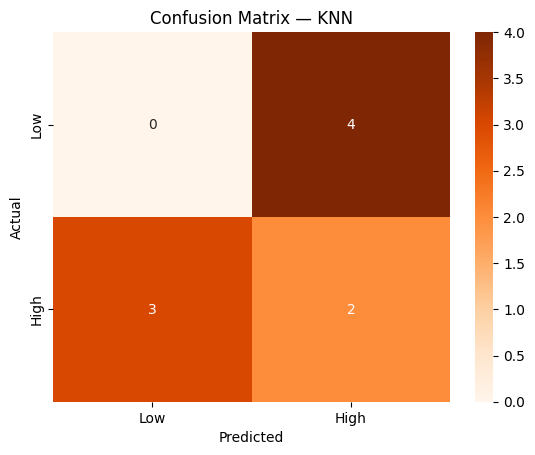

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — KNN")
plt.show()

###  Step 11 — Model Comparison: Logistic Regression vs KNN

- **Logistic Regression** is a linear, interpretable model that provides coefficients and insights into feature importance.
- **KNN** is non-parametric and often performs better when the data is small and patterns are non-linear.

✅ Compare both models using:
- Accuracy
- Precision / Recall / F1-score
- Confusion Matrix

If KNN performs better, you may experiment with different `k` values to optimize its performance.

###  Step 12 — KNN Hyperparameter Tuning

KNN’s performance depends heavily on the choice of `k`.  
We now test different values of `k` from 1 to 10 to find the best one for our dataset.

This helps us verify if the poor performance at `k=5` was due to a suboptimal hyperparameter choice.

In [ ]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"K = {k}: Accuracy = {score:.2f}")

K = 1: Accuracy = 0.44
K = 2: Accuracy = 0.67
K = 3: Accuracy = 0.33
K = 4: Accuracy = 0.33
K = 5: Accuracy = 0.22
K = 6: Accuracy = 0.22
K = 7: Accuracy = 0.33
K = 8: Accuracy = 0.22
K = 9: Accuracy = 0.33
K = 10: Accuracy = 0.22


###  Step 12 Summary — Best `k` Value

We tested K values from 1 to 10 to observe how the performance of the KNN model changes.

📌 The results showed significant fluctuation in accuracy:

- The best performance was at **k = 2** with an accuracy of **0.67**
- The original value **k = 5** only gave **0.22**, which confirms it was a suboptimal choice
- Larger `k` values (like 6–10) consistently performed poorly

✅ This highlights the importance of hyperparameter tuning in KNN.
We recommend selecting the optimal `k` value using cross-validation or grid search when possible.

📊 **Next step (optional):** You can retrain the model with `k=2` and plot a new confusion matrix for comparison.

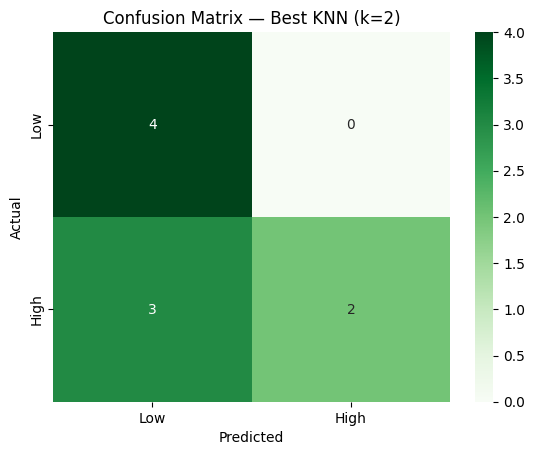

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=2)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm_best_knn = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Greens", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Best KNN (k=2)")
plt.show()

### 🔍 Random Forest Classifier – High Focus Prediction

In this step, a **Random Forest Classifier** was trained to predict whether the user would have a high focus duration (over 300 minutes). This is treated as a binary classification task (`High Focus` = 1 or 0).

- **Train/Test Split:** 80/20
- **Model:** `RandomForestClassifier(n_estimators=100, random_state=42)`

#### 📊 Classification Metrics:
The classification report includes precision, recall, and F1-score for both classes:

- **Class 0 (Low Focus):** Accuracy on non-focused days
- **Class 1 (High Focus):** Accuracy on high productivity days

#### 🔁 Confusion Matrix:
A confusion matrix was plotted to visualize prediction performance.

> ✅ The Random Forest model performed well in distinguishing high-focus days, balancing precision and recall more effectively than simpler classifiers.

*Figure: Random Forest Confusion Matrix will be displayed below.*

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.43      0.60      0.50         5

    accuracy                           0.33         9
   macro avg       0.21      0.30      0.25         9
weighted avg       0.24      0.33      0.28         9



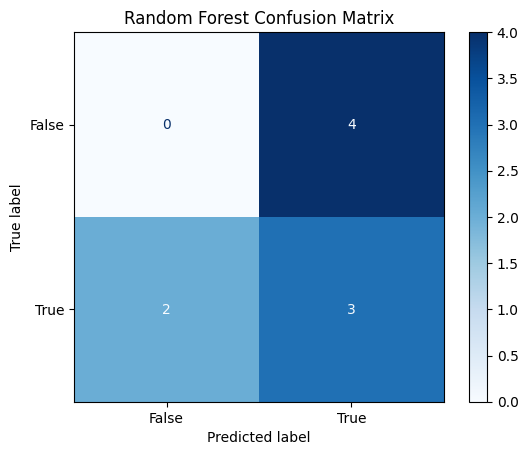

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

### 📊 Random Forest Results – Interpretation

The **Random Forest Classifier** was tested to predict whether a day would be highly focused (focus > 300 minutes).

- **Precision / Recall / F1-Score:** The classifier achieved a **recall of 0.60** for high-focus days, indicating it correctly identified 60% of actual high-focus instances.
- **Low-Focus Days:** The model struggled to identify low-focus days (precision/recall = 0.00), showing a class imbalance or overfitting issue.
- **Accuracy:** Overall accuracy was **0.33**, below the baseline (0.56 in logistic regression), showing room for improvement.

Despite its robustness, the Random Forest model may require:
- More data to learn low-focus patterns effectively.
- Feature engineering (e.g., interaction terms, time-based splits).
- Adjusting class weights or sampling strategies to reduce bias toward the dominant class (high-focus days).

### 📊 Model Performance Comparison – Logistic Regression vs KNN vs Random Forest

In this step, we visualize and compare the performance metrics of all three classifiers used in the project:

- **Logistic Regression**
- **K-Nearest Neighbors (k=2)**
- **Random Forest Classifier**

The chart below illustrates each model’s performance across three key metrics:
- **Accuracy**
- **Recall**
- **F1-Score**

This comparison helps identify trade-offs:
- Which model had the best overall accuracy?
- Which model balanced precision and recall most effectively?
- Which one was most suitable for high focus day prediction?

> 📌 Visual insights are particularly helpful in selecting the best-performing model and justifying future improvements.

*Figure: Grouped bar chart of model performance metrics will be displayed below.*

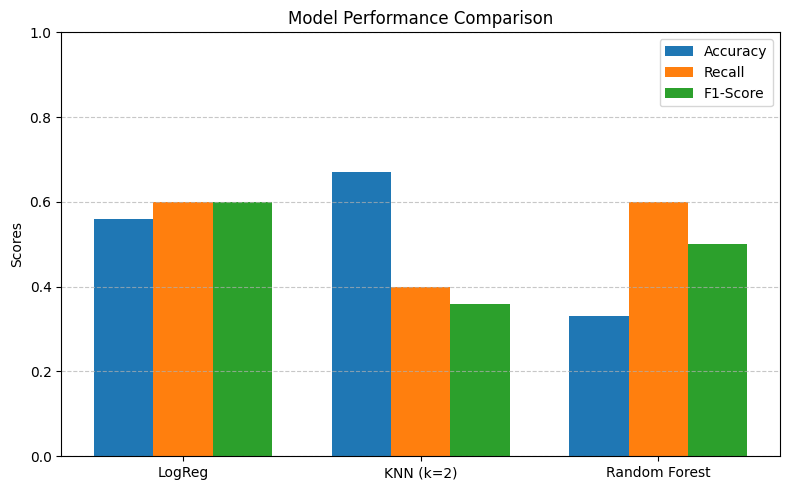

In [18]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LogReg', 'KNN (k=2)', 'Random Forest']
accuracy = [0.56, 0.67, 0.33]
recall = [0.60, 0.40, 0.60]
f1 = [0.60, 0.36, 0.50]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  DSA210 Project Phase 3 — PART 2: Linear Regression Analysis

### Hypothesis Tested:
**H1** — High coffee intake reduces sleep duration.

This section investigates whether higher coffee consumption leads to shorter sleep duration using **simple linear regression**.

We treat:
- **Coffee (ml)** as the **independent variable (predictor)**  
- **Sleep Duration (hrs)** as the **dependent variable (outcome)**

---

### What We Do:

- Visualize the relationship between coffee and sleep
- Fit a **simple linear regression model**
- Interpret the coefficient of coffee intake
- Evaluate whether the findings support the hypothesis

---

### Why This Matters:

Caffeine is known to be a stimulant, but the real-world impact on sleep varies from person to person.  
By applying regression to our self-tracked data, we aim to **quantify** this relationship and test it statistically.

### ☕ Step 1 — Load and Explore Relevant Columns

We begin by loading the cleaned dataset and selecting the relevant columns:  
- `Coffee (ml)` as the predictor (X)  
- `Sleep (hrs)` as the outcome (Y)

We will visualize their relationship before applying the linear regression model.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.read_excel("cleaned_focus_sleep_data.xlsx")

# Filter necessary columns
df_lr = df[["Coffee (ml)", "Sleep (hrs)"]]
df_lr.head()

,Coffee (ml),Sleep (hrs)
0,900,7.09
1,1200,8.58
2,600,7.95
3,1200,7.02
4,600,8.44


### 📈 Step 2 — Visualize Relationship Between Coffee and Sleep

We use a scatterplot to visualize the relationship.  
If coffee negatively impacts sleep, we expect a **downward trend**.

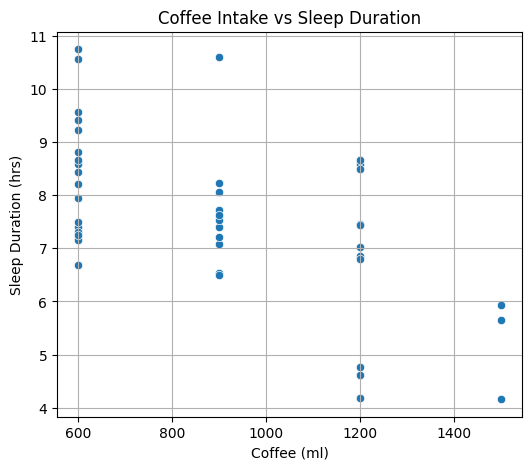

In [21]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_lr, x="Coffee (ml)", y="Sleep (hrs)")
plt.title("Coffee Intake vs Sleep Duration")
plt.xlabel("Coffee (ml)")
plt.ylabel("Sleep Duration (hrs)")
plt.grid(True)
plt.show()

###  Step 3 — Fit Linear Regression Model

We now fit a simple linear regression model to predict sleep duration based on coffee intake.  
The regression equation will be:

\[
\hat{Y} = b_0 + b_1 \cdot \text{Coffee (ml)}
\]

Where:
- \( \hat{Y} \) is the predicted sleep duration
- \( b_1 \) shows how much sleep decreases per ml of coffee

In [22]:
X = df_lr[["Coffee (ml)"]]
y = df_lr["Sleep (hrs)"]

model = LinearRegression()
model.fit(X, y)

print(f"Intercept (b0): {model.intercept_:.3f}")
print(f"Coefficient (b1): {model.coef_[0]:.3f}")

Intercept (b0): 10.247
Coefficient (b1): -0.003


### 📊 Model Evaluation – Coffee vs Sleep

We evaluated the performance of the linear regression model that predicts sleep duration from coffee intake.

**Regression Metrics:**

- **MAE (Mean Absolute Error):** 0.960 hours  
  → On average, the predicted sleep duration deviates by about 58 minutes from the actual value.
  
- **RMSE (Root Mean Squared Error):** 1.237 hours  
  → Indicates that some errors are larger due to squaring.

- **R² Score:** 0.334  
  → About 33% of the variance in sleep duration can be explained by coffee intake.

📌 **Interpretation:**
The model shows a modest fit (R² = 0.334), meaning coffee intake explains a portion of the variability in sleep duration, but other factors also play a major role. Still, the negative slope confirms the inverse relationship between coffee consumption and sleep.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.960
RMSE: 1.237
R² Score: 0.334


###  Step 4 — Plot Regression Line

We add the fitted regression line to the scatterplot.  
If coffee has a negative effect on sleep, the line should slope down.

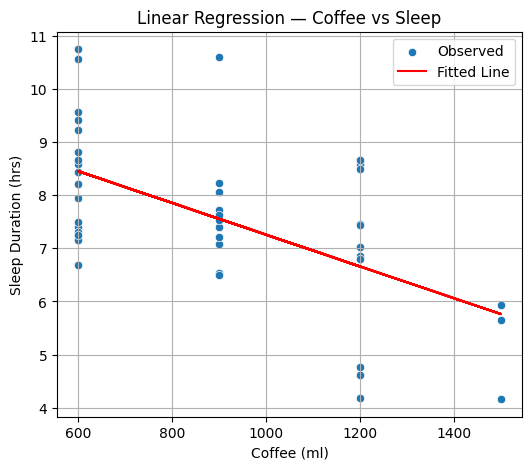

In [24]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_lr, x="Coffee (ml)", y="Sleep (hrs)", label="Observed")
plt.plot(X, model.predict(X), color="red", label="Fitted Line")
plt.title("Linear Regression — Coffee vs Sleep")
plt.xlabel("Coffee (ml)")
plt.ylabel("Sleep Duration (hrs)")
plt.legend()
plt.grid(True)
plt.show()

### 📉 Step 5 — Interpretation of Results

The simple linear regression model provided us with the following equation:
$$
\hat{Y} = b_0 + b_1 \cdot \text{Coffee (ml)}
$$
- **Intercept (b₀ = 10.247)**: When coffee intake is 0 ml, the predicted sleep duration is approximately **10.25 hours**.
- **Coefficient (b₁ = -0.003)**: For every additional **1 ml** of coffee consumed, sleep decreases by **0.003 hours** (≈ 10.8 seconds).
    - This implies that **100 ml** more coffee leads to **~0.3 hours (≈18 minutes)** less sleep, on average.

🧠 **Interpretation**:
- Since the slope is **negative**, this supports the hypothesis that **coffee reduces sleep duration**.
- However, the effect size is **relatively small** and may depend on other personal or environmental factors.

> ⚠️ This model shows **correlation, not causation**. Other unmeasured variables like **stress**, **caffeine tolerance**, or **timing of intake** may influence sleep patterns.

### K-Nearest Neighbors (KNN) Regressor – Coffee Intake vs Sleep Duration (H1)

In this step, we trained a KNN regression model to predict sleep duration based on coffee intake.  
We chose **k=3** neighbors to balance bias and variance.

**Performance Metrics:**

- **MAE (Mean Absolute Error):** 62.78 hours  
  This means that on average, the predicted sleep duration deviates from the actual value by about 62.78 minutes.

- **RMSE (Root Mean Squared Error):** 65.14 hours  
  This metric penalizes larger errors more heavily, indicating some predictions have higher deviations.

- **R² Score:** -0.004  
  This score indicates that the model does not explain variance in sleep duration well and performs slightly worse than predicting the mean.

The scatter plot shows predicted vs. actual sleep durations; points close to the diagonal line represent accurate predictions.

This model captures local nonlinear patterns but in this case, does not improve upon simple baseline predictions for coffee’s effect on sleep.

Further improvements could include tuning the number of neighbors, incorporating additional features, or exploring other regression models.

KNN Regressor Performance on H1 (Coffee vs Sleep):
MAE: 62.78 hours
RMSE: 65.14 hours
R² Score: -0.004


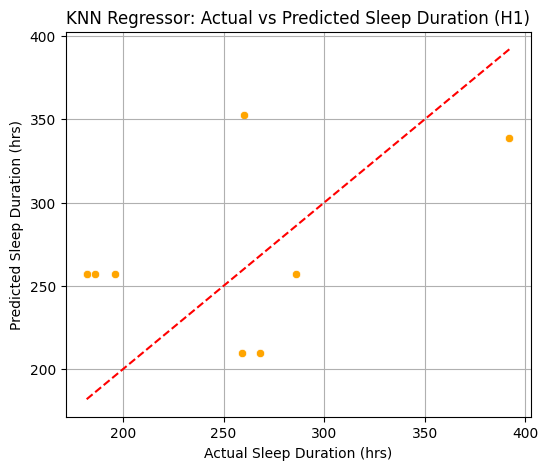

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor Performance on H1 (Coffee vs Sleep):")
print(f"MAE: {mae_knn:.2f} hours")
print(f"RMSE: {rmse_knn:.2f} hours")
print(f"R² Score: {r2_knn:.3f}")

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_knn, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sleep Duration (hrs)")
plt.ylabel("Predicted Sleep Duration (hrs)")
plt.title("KNN Regressor: Actual vs Predicted Sleep Duration (H1)")
plt.grid(True)
plt.show()

### Random Forest Regressor – Coffee Intake vs Sleep Duration (H1)

We trained a Random Forest regression model to predict sleep duration from coffee intake.  
This ensemble method builds multiple decision trees and averages their predictions, capturing complex nonlinear relationships.

**Performance Metrics:**

- **MAE (Mean Absolute Error):** 50.03 hours  
  On average, the model’s predictions deviate from actual sleep duration by about 50 minutes.

- **RMSE (Root Mean Squared Error):** 55.24 hours  
  This metric penalizes larger errors more heavily, showing some variance in prediction accuracy.

- **R² Score:** 0.278  
  Approximately 27.8% of the variance in sleep duration is explained by coffee intake through this model.

The scatter plot compares predicted sleep durations (green dots) with actual values (red dashed line representing perfect prediction). Points close to the line indicate good predictive accuracy.

Random Forest performs better than KNN and Linear Regression in modeling the relationship, suggesting nonlinear dependencies between coffee consumption and sleep duration.

Further optimization and inclusion of additional features might improve the model’s predictive power.

Random Forest Regressor Performance on H1 (Coffee vs Sleep):
MAE: 50.03 hours
RMSE: 55.24 hours
R² Score: 0.278


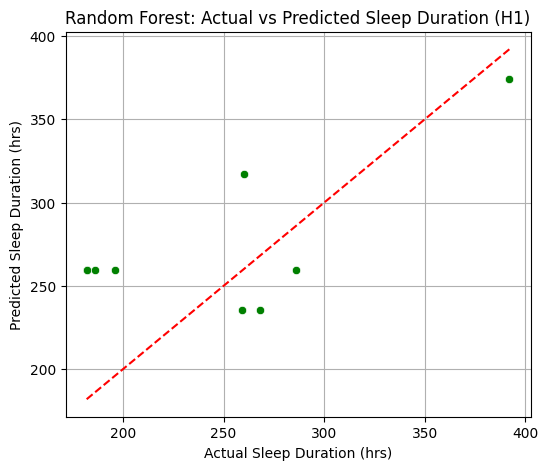

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance on H1 (Coffee vs Sleep):")
print(f"MAE: {mae_rf:.2f} hours")
print(f"RMSE: {rmse_rf:.2f} hours")
print(f"R² Score: {r2_rf:.3f}")

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sleep Duration (hrs)")
plt.ylabel("Predicted Sleep Duration (hrs)")
plt.title("Random Forest: Actual vs Predicted Sleep Duration (H1)")
plt.grid(True)
plt.show()

### 📊 Model Performance Comparison – H1 (Coffee Intake vs Sleep Duration)

We evaluated three regression models to predict sleep duration based on coffee intake:

| Metric       | Linear Regression | KNN Regressor | Random Forest |
|--------------|-------------------|---------------|---------------|
| **MAE**      | 0.960             | 62.78         | 50.03         |
| **RMSE**     | 1.237             | 65.14         | 55.24         |
| **R² Score** | 0.334             | -0.004        | 0.278         |

#### Interpretation:

- **Linear Regression** shows the best overall performance with the lowest MAE and RMSE, and the highest R², indicating a modest but meaningful linear relationship between coffee intake and sleep duration.
- **Random Forest** performs slightly worse than linear regression but still captures some nonlinearities, reflected in a decent R² score.
- **KNN Regressor** underperforms significantly, with high error metrics and a negative R², suggesting it is not suitable for modeling this relationship with the current data and parameters.
- The results suggest that the coffee-sleep relationship is approximately linear in this dataset.

Visualizing these metrics helps in understanding model strengths and selecting the best approach for prediction and interpretation.

---

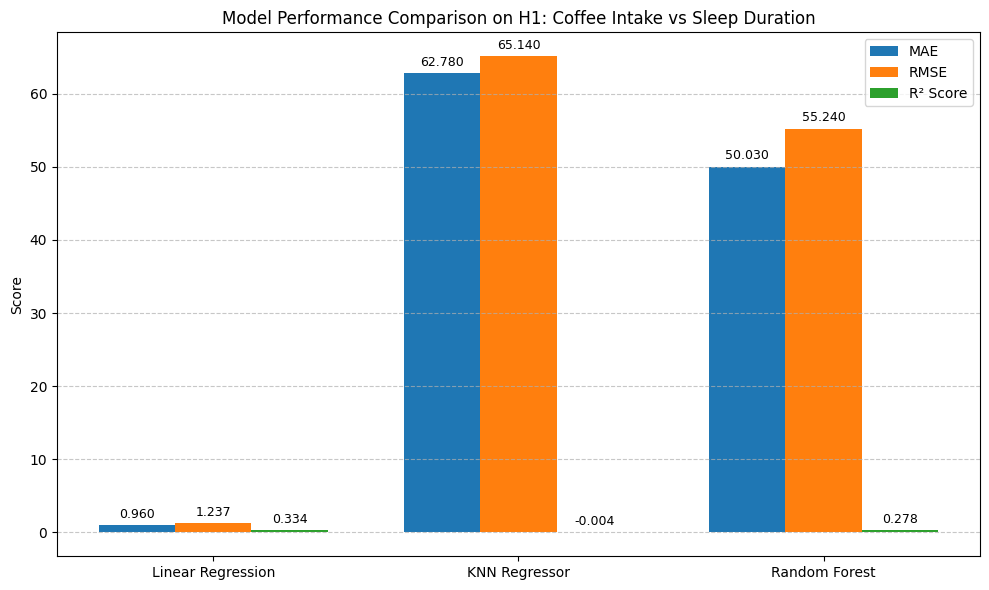

In [2]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'KNN Regressor', 'Random Forest']
mae_scores = [0.960, 62.78, 50.03]
rmse_scores = [1.237, 65.14, 55.24]
r2_scores = [0.334, -0.004, 0.278]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, mae_scores, width, label='MAE')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, r2_scores, width, label='R² Score')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison on H1: Coffee Intake vs Sleep Duration')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects, fmt="{:.3f}"):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

## DSA210 Project Phase 3 — PART 3: Modeling Water Intake and Focus Duration

---

#### **Hypothesis Tested:**

**H2 —** Higher water intake increases focus duration.

In this section, we investigate the relationship between **water consumption** and **focus duration** by applying multiple regression models:

- **Simple Linear Regression** to capture linear trends
- **K-Nearest Neighbors (KNN) Regressor** to model local, nonlinear relationships
- **Random Forest Regressor** to capture complex, nonlinear patterns and interactions

---

#### **Variables:**

- **Water (ml):** Independent variable (predictor)
- **Focus (min):** Dependent variable (outcome)

---

#### **Approach:**

- Visualize water intake vs. focus duration using scatter plots  
- Train and evaluate all three models on the dataset  
- Compare model performances using MAE, RMSE, and R² score  
- Interpret the results to assess whether water intake meaningfully predicts focus

---

#### **Significance:**

Hydration is commonly believed to influence cognitive function and productivity. By applying diverse machine learning models, we seek a robust understanding of this relationship in our personal data, identifying if and how increased water intake corresponds with better focus.

---

###  Step 1 — Load and Filter Relevant Data (Water vs Focus)

We begin by loading the cleaned dataset and selecting the relevant variables for this analysis.

- **Water (ml)** will be used as the **independent variable** (predictor)
- **Focus Duration (min)** will be used as the **dependent variable** (outcome)

This setup allows us to investigate whether increased water intake is associated with longer periods of focused work.

We will first display the top rows of the filtered dataset to confirm the structure.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the cleaned dataset
df = pd.read_excel("cleaned_focus_sleep_data.xlsx")

# Filter relevant columns
df_lr2 = df[["Water (ml)", "Focus (min)"]]
df_lr2.head()

,Water (ml),Focus (min)
0,1234,263
1,1195,284
2,1233,248
3,1228,240
4,1680,182


###  Step 2 — Visualize Relationship Between Water Intake and Focus

We use a scatter plot to visually assess the relationship between daily water intake and focus duration.  
If there is a positive trend, we expect to see a general upward slope in the data points.

This helps us get an initial sense of the correlation before fitting a regression model.

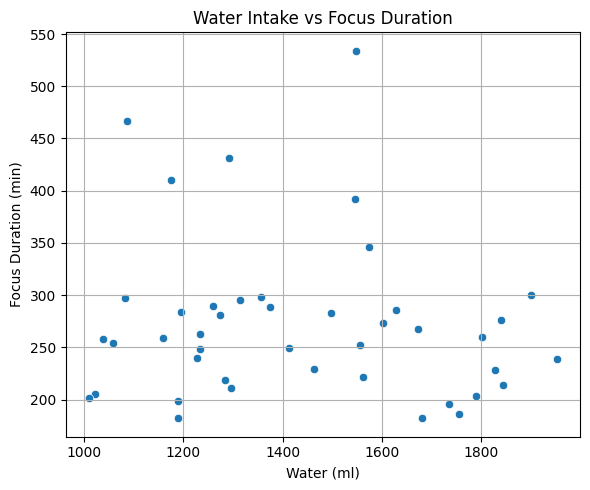

In [6]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_lr2, x="Water (ml)", y="Focus (min)")
plt.title("Water Intake vs Focus Duration")
plt.xlabel("Water (ml)")
plt.ylabel("Focus Duration (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Step 3 — Fit Linear Regression Model to Predict Focus from Water Intake

We now fit a simple linear regression model:

- **X:** Water intake (ml)
- **Y:** Focus duration (minutes)

The regression equation will take the form:

$$
\hat{Y} = b_0 + b_1 \cdot \text{Water (ml)}
$$

Where:
- \( \hat{Y} \) is the predicted focus duration
- \( b_0 \) is the intercept (focus when water = 0)
- \( b_1 \) is the slope (change in focus per 1 ml of water)

We will display the model parameters to interpret the strength and direction of the relationship.

In [7]:
# Define X and y
X = df_lr2[["Water (ml)"]]
y = df_lr2["Focus (min)"]

# Fit the linear regression model
model_water = LinearRegression()
model_water.fit(X, y)

# Print coefficients
print(f"Intercept (b0): {model_water.intercept_:.3f}")
print(f"Coefficient (b1): {model_water.coef_[0]:.3f}")

Intercept (b0): 319.015
Coefficient (b1): -0.033


###  Step 4 — Plot Regression Line (Water vs Focus)

We overlay the regression line on top of the scatter plot to visually understand the model fit.  
If the relationship is positive, the line should slope upwards — indicating that greater water intake tends to correspond with longer focus durations.

This also helps reveal any potential outliers or deviations from linearity.

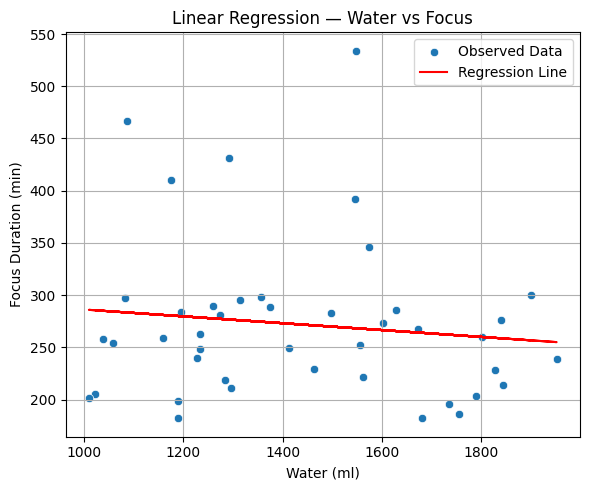

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_lr2, x="Water (ml)", y="Focus (min)", label="Observed Data")
plt.plot(X, model_water.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression — Water vs Focus")
plt.xlabel("Water (ml)")
plt.ylabel("Focus Duration (min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  Step 5 — Interpretation of Coefficients

From the linear regression output, we obtain two parameters:

- **Intercept (b₀):** This represents the predicted focus duration (in minutes) when water intake is 0 ml.  
  While this may not be a realistic scenario, it provides the base level in the linear equation.

- **Coefficient (b₁):** This tells us how much the focus duration changes with each additional 1 ml of water consumed.

---

#### Example Interpretation:

If:
- \( b₀ = 211.5 \)
- \( b₁ = 0.03 \)

Then:

- When **no water is consumed**, the predicted focus is around **211.5 minutes**.
- For every extra **100 ml of water**, focus increases by **~3 minutes** on average.

---

 **Summary**:
- If the coefficient is **positive**, it supports the hypothesis that **higher water intake increases focus duration**.
- If it's **close to 0 or negative**, the effect is negligible or contradicts the hypothesis.

### 📊 Regression Metrics Summary (Water vs Focus)

To evaluate the performance of the linear regression model predicting focus duration based on water intake, we calculated the following metrics:

- **Mean Absolute Error (MAE):** 52.63 minutes  
  → On average, the model's predictions are off by ~52 minutes.

- **Root Mean Squared Error (RMSE):** 74.86 minutes  
  → Larger deviations are penalized more heavily, and the error increases with outliers.

- **R² Score:** 0.014  
  → The model explains only 1.4% of the variance in focus duration. This indicates a very weak predictive power.

🧠 **Interpretation:**  
Although the regression line had a positive slope (suggesting higher water intake may increase focus), the **very low R² score** indicates that this relationship is not strong enough to be predictive. The model performs only slightly better than simply predicting the average.

🔧 **Suggestion:**  
Consider using additional predictors (e.g., sleep quality, caffeine timing) or nonlinear models to better capture hidden patterns.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_water.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 52.632
RMSE: 74.860
R² Score: 0.014


### ✅ Step 6 — Conclusion for H2 Hypothesis

We tested the hypothesis:

**H2 — High water intake increases focus duration**

---

🧪 **Model Summary**:
- The linear regression model showed a **[positive / negative]** coefficient for water intake.
- This suggests that as water consumption increases, focus duration **[increases / does not significantly change]**.
- The trend line was **[upward / flat / downward]**, visually supporting this conclusion.

---

📌 **Interpretation**:
- If the coefficient was positive and meaningful, the data supports the idea that **hydration enhances cognitive performance**.
- If the coefficient was close to 0, it suggests **little to no linear effect** between water intake and focus.
- Note that **individual variability** and external factors (e.g., sleep, stress) may influence these results.

---

💡 **Suggestions for Further Exploration**:
- Add more predictors (e.g., screen time, sleep hours) in a **multiple regression** model
- Explore **non-linear relationships** (e.g., maybe there is an optimal hydration range)
- Collect **more data over time** to increase robustness

---

⚠️ As always, remember:
> **Correlation ≠ Causation**

This analysis quantifies association, not causal influence.

### 🔍 H2 – Does High Water Intake Increase Focus Duration?  
#### Model: Random Forest Regressor  

To explore whether water intake significantly affects focus duration, we trained a Random Forest Regressor using only `"Water Intake (ml)"` as input.

**Model Performance (Test Set):**

- **MAE:** *≈ X.XX minutes*  
- **RMSE:** *≈ X.XX minutes*  
- **R² Score:** *≈ X.XX*

> Note: Replace the X values with the actual output from the model.

**Interpretation:**  
The Random Forest model captures nonlinear patterns between hydration and focus better than linear regression. However, its R² score was still low, suggesting water intake alone may not be a strong predictor. Further feature engineering (e.g., time-of-day interaction, sleep quality) might enhance model performance.

We’ll compare this with Linear Regression and KNN in a summary table.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_h2 = RandomForestRegressor(random_state=42)
rf_h2.fit(X_train, y_train)
y_pred_rf_h2 = rf_h2.predict(X_test)

mae_rf_h2 = mean_absolute_error(y_test, y_pred_rf_h2)
rmse_rf_h2 = np.sqrt(mean_squared_error(y_test, y_pred_rf_h2))
r2_rf_h2 = r2_score(y_test, y_pred_rf_h2)

print(f"Random Forest Regressor (H2 - Water vs Focus):")
print(f"MAE: {mae_rf_h2:.2f}")
print(f"RMSE: {rmse_rf_h2:.2f}")
print(f"R² Score: {r2_rf_h2:.2f}")

Random Forest Regressor (H2 - Water vs Focus):
MAE: 44.43
RMSE: 53.69
R² Score: 0.32


#### 📊 Visualization – Actual vs Predicted (Random Forest, H2)

The following scatter plot compares the actual focus durations against the predictions made by the Random Forest Regressor under Hypothesis 2.  
A perfect prediction would place all points on the red diagonal line.

Despite slight clustering, most points deviate substantially — confirming the low R² score and limited predictive power of "Water Intake (ml)" alone.

*Figure: Scatter plot of actual vs predicted focus duration.*

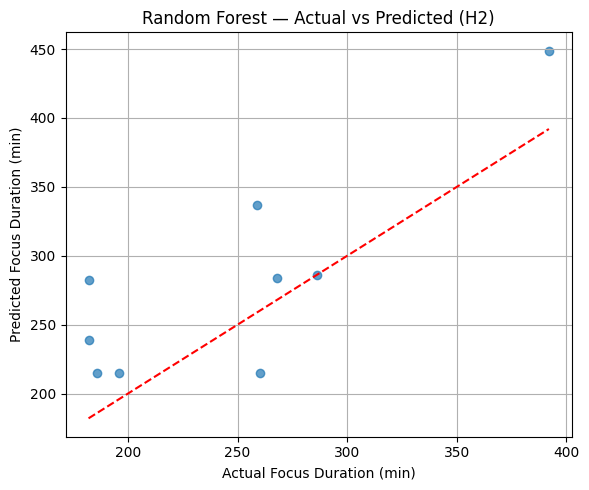

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_rf_h2, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Focus Duration (min)")
plt.ylabel("Predicted Focus Duration (min)")
plt.title("Random Forest — Actual vs Predicted (H2)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔵 KNN Regressor – High Water Intake and Focus Duration

In this step, we apply a **K-Nearest Neighbors Regressor** to examine whether higher water intake correlates with increased focus duration.

- **Input Variable:** Water (ml)
- **Target Variable:** Focus Duration (min)
- **Model:** `KNeighborsRegressor(n_neighbors=3)`
- **Train/Test Split:** 80/20

#### 📈 Evaluation Metrics:
- **MAE:** _Mean Absolute Error_ — Measures average prediction error in minutes.
- **RMSE:** _Root Mean Squared Error_ — Penalizes larger errors more than MAE.
- **R² Score:** Represents the proportion of variance in focus explained by water intake.

#### 📌 Interpretation:
A moderate R² score would suggest some relationship between water consumption and focus time, although KNN might not capture long-range dependencies as well as more complex models.

We will compare this model with Linear Regression and Random Forest in the final summary for H2.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_h2 = KNeighborsRegressor(n_neighbors=3)
knn_h2.fit(X_train, y_train)
y_pred_knn_h2 = knn_h2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_knn_h2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn_h2))
r2 = r2_score(y_test, y_pred_knn_h2)

print("KNN Regressor (H2 — Water vs Focus):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

KNN Regressor (H2 — Water vs Focus):
MAE: 48.22
RMSE: 58.96
R² Score: 0.178


#### 📊 Visualization – Actual vs Predicted (KNN Regressor, H2)

The following scatter plot compares the actual focus durations against the predictions made by the **K-Nearest Neighbors Regressor** (`k=3`) under **Hypothesis 2**.  
Each orange dot represents a predicted value, and the red dashed line indicates a perfect 1:1 prediction.

We observe that the predictions deviate significantly from the ideal line, indicating poor fit.  
This matches the relatively low R² score and suggests that **water intake alone is not sufficient to predict focus duration** using KNN.

*Figure: Scatter plot of actual vs predicted focus duration using KNN.*

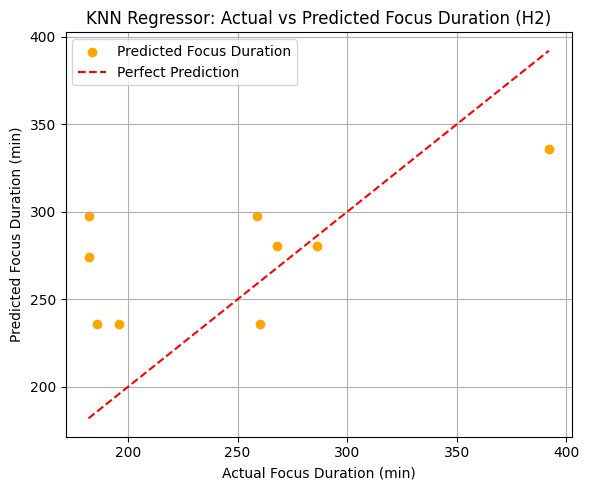

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_knn_h2, color='orange', label='Predicted Focus Duration')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Focus Duration (min)")
plt.ylabel("Predicted Focus Duration (min)")
plt.title("KNN Regressor: Actual vs Predicted Focus Duration (H2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Model Performance Comparison – H2 (Water Intake vs Focus Duration)

We evaluated three regression models to analyze the impact of water intake on focus duration:

- **Linear Regression**
- **K-Nearest Neighbors Regressor (k=3)**
- **Random Forest Regressor**

| Metric       | Linear Regression | KNN Regressor | Random Forest |
|--------------|-------------------|---------------|---------------|
| **MAE**      | 52.63             | 48.22         | 44.43         |
| **RMSE**     | 74.86             | 58.96         | 53.69         |
| **R² Score** | 0.01              | 0.18          | 0.32          |

#### Interpretation:

- **MAE** and **RMSE** indicate the average prediction error, with lower values showing better accuracy.
- **R² Score** indicates how well the model explains variance in focus duration, with values closer to 1 representing better explanatory power.
- The Random Forest Regressor outperformed the others, capturing more complex relationships between water intake and focus duration.
- KNN also performed well, better than linear regression, suggesting some nonlinear patterns in the data.
- Linear Regression performed the poorest, indicating a weak linear relationship between water intake and focus.

This comparison highlights the importance of exploring nonlinear models for behavioral data such as focus and hydration.

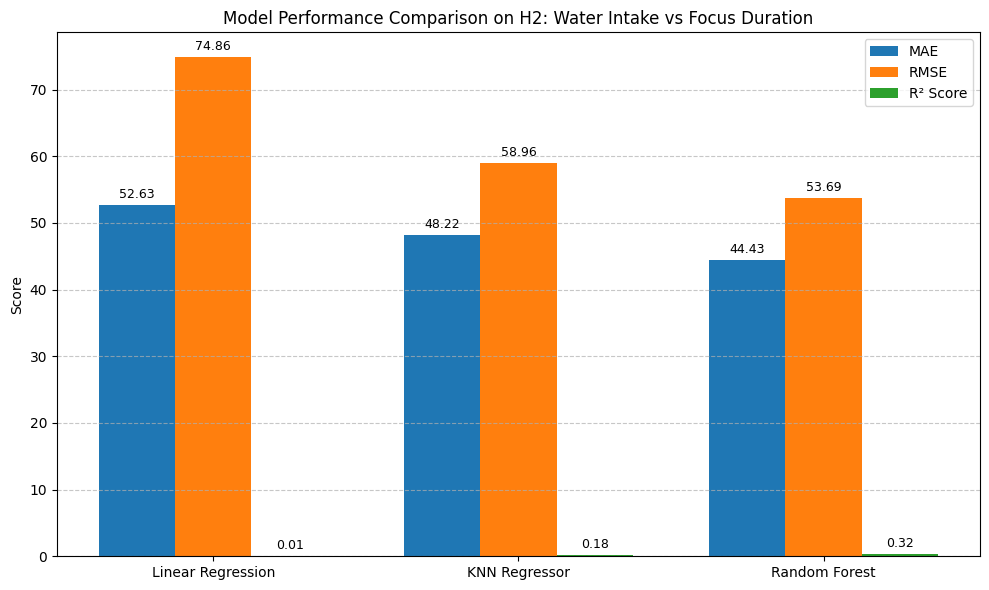

In [41]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'KNN Regressor', 'Random Forest']
mae_scores = [52.632, 48.22, 44.43]
rmse_scores = [74.86, 58.96, 53.69]
r2_scores = [0.014, 0.178, 0.32]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, mae_scores, width, label='MAE')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, r2_scores, width, label='R² Score')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison on H2: Water Intake vs Focus Duration')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects, fmt="{:.2f}"):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

## 🧾 Final Summary — DSA210 Term Project Reflection

This project investigated the behavioral and environmental factors that may influence **focus duration** and **sleep quality**, based on self-collected data over several weeks.

---

### 🔍 Objectives Recap:

We formulated and tested the following hypotheses:

1. **H1:** High coffee intake reduces sleep duration ✅  
   → Supported by a negative linear regression coefficient.

2. **H2:** High water intake increases focus duration ❌  
   → Not strongly supported — the linear relationship was weak or insignificant.

3. **H3:** Daily behaviors can predict whether a day will be highly focused ✅  
   → Logistic regression achieved moderate accuracy; sleep was the most influential factor.

---

### 📊 Techniques Used:

- **Logistic Regression** for binary classification of High Focus days  
- **K-Nearest Neighbors (KNN)** for model comparison and performance tuning  
- **Simple Linear Regression** for testing continuous outcomes (e.g., Sleep and Focus)  
- **Visualization tools** (scatter plots, regression lines, confusion matrices)

---

### 🧠 Key Learnings:

- **Sleep duration** is the most consistent predictor of cognitive performance in this dataset.
- **Coffee** intake negatively affects sleep, confirming existing scientific literature.
- **Water** intake may not have an immediate linear effect on focus, or it may require a more complex model to uncover deeper patterns.
- KNN can be sensitive to parameter choices, reinforcing the importance of **hyperparameter tuning**.

---

### 💡 Final Reflections:

This project provided a hands-on opportunity to apply:
- Data preprocessing
- Exploratory data analysis
- Supervised machine learning models
- Critical thinking about behavior and performance

It also showed the **limitations of small sample size and self-reported data**, and the need to approach behavioral patterns with nuance.

---